## Multi-label classification

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.conv_learner import *
from fastai.plots import *

# Py file for planet competition
from planet import f2

In [4]:
PATH = 'data/planet/'

In [5]:
ls {PATH}

sample_submission_v2.csv  test_v2_file_mapping.csv  train-jpg/
test-jpg/                 tmp/                      train_v2.csv


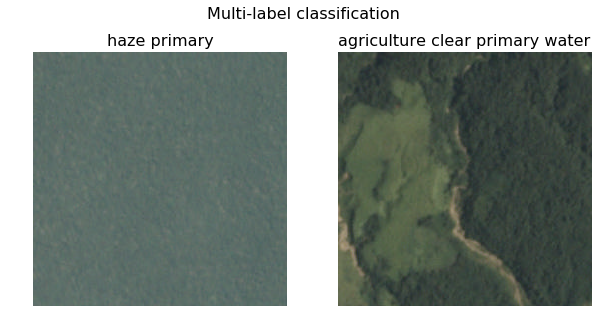

In [6]:
list_paths = [f"{PATH}train-jpg/train_0.jpg", f"{PATH}train-jpg/train_1.jpg"]
titles=["haze primary", "agriculture clear primary water"]
plots_from_files(list_paths, titles=titles, maintitle="Multi-label classification")

In multi-label classification each sample can belong to one or more clases. In the previous example, the first images belongs to two clases: *haze* and *primary*. The second image belongs to four clases: *agriculture*, *clear*, *primary* and  *water*.

## Multi-label models for Planet dataset

In [7]:
# F2 for this competiotion
metrics=[f2]

# Using Resnext from pytorch 
f_model = inceptionv4

label_csv = f'{PATH}train_v2.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

We use a different set of data augmentations for this dataset - we also allow vertical flips, since we don't expect vertical orientation of satellite images to change our classifications.

In [1]:
def get_data(sz):
    # Augment our data
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 
                                        'train-jpg',
                                        label_csv, 
                                        bs=124,
                                        tfms=tfms,
                                        suffix='.jpg', 
                                        val_idxs=val_idxs, 
                                        test_name='test-jpg')

In [25]:
# Image size is 256
data = get_data(sz)

In [26]:
# dl is date loader of transformed minibatch (like genetrators in pyton)
# return images and labels
x,y = next(iter(data.val_dl))

In [28]:
# check labels of the first image
list(zip(data.classes, y[0]))

[('agriculture', 1.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 1.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 0.0),
 ('haze', 0.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 0.0),
 ('selective_logging', 0.0),
 ('slash_burn', 0.0),
 ('water', 1.0)]

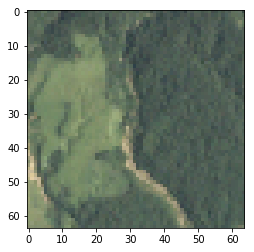

In [32]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4);

In [33]:
sz=64

In [34]:
data = get_data(sz)

In [35]:
data = data.resize(int(sz*1.3), 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [36]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.265276   0.207374   0.828215  



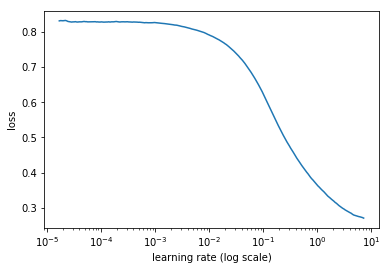

In [37]:
lrf=learn.lr_find()
learn.sched.plot()

In [38]:
lr = 0.2

In [39]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)
learn.sched.plot_loss()

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.154374   0.140343   0.873013  
    1      0.143116   0.131804   0.882475                    
    2      0.142797   0.129653   0.884975                    
    3      0.138502   0.128491   0.884989                    
    4      0.135406   0.126596   0.887654                    
    5      0.131357   0.125051   0.889688                    
    6      0.132279   0.124908   0.889488                    



[0.12490843, 0.88948790816987056]

In [41]:
lrs = np.array([lr/9,lr/3,lr])

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.124919   0.112795   0.903827  
    1      0.116395   0.107999   0.907017                    
    2      0.112045   0.104058   0.911209                    
    3      0.111379   0.103867   0.91164                     
    4      0.105858   0.101638   0.913548                    
    5      0.102317   0.099191   0.914956                    
    6      0.100291   0.098926   0.916118                     



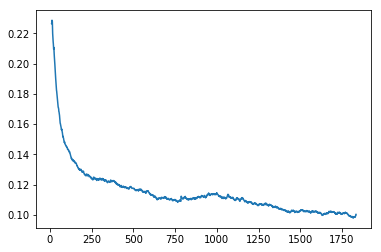

In [42]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.sched.plot_loss()

In [43]:
learn.save(f'{sz}')

#### Change size to 128 x 128

In [44]:
sz=128

learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)
learn.sched.plot_loss()

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                           
    0      0.102073   0.09889    0.913978  
    1      0.100858   0.097292   0.916371                     
    2      0.097679   0.096516   0.916276                     
    3      0.097408   0.09665    0.916414                     
    4      0.095334   0.09487    0.918739                     
    5      0.095945   0.094678   0.918744                     
    6      0.097104   0.094853   0.918025                     



[0.094853237, 0.91802474829149616]

In [45]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')
learn.sched.plot_loss()

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                           
    0      0.094857   0.090116   0.923424  
    1      0.092636   0.089426   0.92288                      
    2      0.089938   0.08677    0.927398                     
    3      0.094404   0.08792    0.924911                     
    4      0.089208   0.087513   0.924801                     
    5      0.086096   0.085788   0.927956                     
    6      0.084951   0.084806   0.9281                       



#### Change size to 256 x 256

In [46]:
sz=256

learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)
learn.sched.plot_loss()

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                           
    0      0.09061    0.088813   0.924729  
    1      0.090364   0.088385   0.925994                     
    2      0.08927    0.087841   0.926315                     
    3      0.08974    0.087902   0.926489                     
    4      0.090337   0.087549   0.926242                     
    5      0.088939   0.08678    0.92712                      
    6      0.088471   0.086686   0.927761                     



[0.086686283, 0.92776063101638639]

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                           
    0      0.087895   0.083154   0.93076   
    1      0.088798   0.083336   0.929551                     
    2      0.08484    0.082024   0.931254                     
    3      0.084902   0.083307   0.929505                     
    4      0.083627   0.082798   0.92989                      
    5      0.082792   0.081564   0.931355                     
    6      0.078939   0.081376   0.932473                     



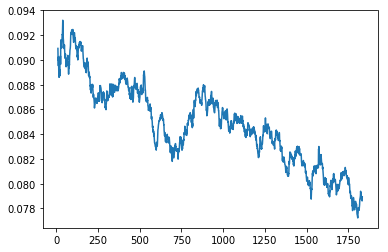

In [47]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')
learn.sched.plot_loss()

In [48]:
# [ 6.       0.07928  0.0792   0.93554]

multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

# This function tries multiple threshold in a given range and returns the one which maximize the F2 score
threshold = opt_th(multi_preds, y)
print(threshold)

In [ ]:
f2(preds,y)

0.93103335589501612

### End

In [11]:
sz=256
data = get_data(sz)
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)
learn.load(f'{sz}')

In [ ]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

# This function tries multiple threshold in a given range and returns the one which maximize the F2 score
threshold = opt_th(multi_preds, y)
print(threshold)

In [ ]:
prob_preds, y= learn.TTA(is_test=True)

In [ ]:
threshold = opt_th(prob_preds, y)

In [20]:
classes = np.array(data.classes, dtype=str)
res = [" ".join(classes[np.where(pp > threshold)]) for pp in prob_preds[0]] 

test_fnames = [os.path.basename(f).split(".")[0] for f in data.test_ds.fnames]
test_df = pd.DataFrame(res, index=test_fnames, columns=['tags'])

test_df.to_csv('planet_resnet34.csv', index_label='image_name')

In [21]:
from IPython.display import FileLink
FileLink('planet_resnet34.csv')

/home/paperspace/fastai/courses/dl1/planet_resnet34.csv

### Give us score of 0.92977